In [9]:
from greenlearning.utils import DataProcessor
from greenlearning.model import *
import matplotlib.pyplot as plt

%env TF_MLC_LOGGING=1
%env TF_CPP_MIN_LOG_LEVEL=2

env: TF_MLC_LOGGING=1
env: TF_CPP_MIN_LOG_LEVEL=2


In [2]:
data = DataProcessor("greenlearning/data/examples/datasets/laplace.mat")
data.generateDataset()

Metal device set to: Apple M1 Pro


In [3]:
model = Model(activation = 'relu')

In [4]:
model.train(data)

Training loss at epoch 0 = 7.03E-01
Training loss at epoch 1 = 8.83E-01
Training loss at epoch 2 = 4.08E-01
Training loss at epoch 3 = 4.26E-01
Training loss at epoch 4 = 4.24E-01
Training loss at epoch 5 = 4.41E-01
Training loss at epoch 6 = 3.05E-01
Training loss at epoch 7 = 2.85E-01
Training loss at epoch 8 = 2.94E-01
Training loss at epoch 9 = 2.82E-01
Training loss at epoch 10 = 1.91E-01
Training loss at epoch 11 = 1.77E-01
Training loss at epoch 12 = 1.86E-01
Training loss at epoch 13 = 2.15E-01
Training loss at epoch 14 = 1.38E-01
Training loss at epoch 15 = 1.23E-01
Training loss at epoch 16 = 1.16E-01
Training loss at epoch 17 = 1.19E-01
Training loss at epoch 18 = 8.84E-02
Training loss at epoch 19 = 9.45E-02
Training loss at epoch 20 = 6.76E-02
Training loss at epoch 21 = 4.25E-02
Training loss at epoch 22 = 4.43E-02
Training loss at epoch 23 = 3.64E-02
Training loss at epoch 24 = 2.94E-02
Training loss at epoch 25 = 2.03E-02
Training loss at epoch 26 = 2.55E-02
Training lo

In [6]:
from greenlearning.utils import generateEvaluationGrid

def evalGreen(model, xF, xU):
    X = generateEvaluationGrid(xF, xU)
    nF, nU = xF.shape[0], xU.shape[0]
    G = tf.transpose(tf.reshape(model.G(X),(nF, nU)))
    return G.numpy()

In [7]:
xF, xU = data.xF, data.xU
x, y = np.meshgrid(xF, xU)
G = evalGreen(model, xF, xU)

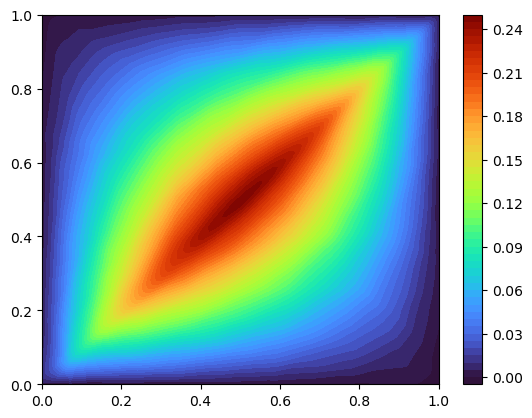

In [11]:
plt.figure()
plt.contourf(x,y,G, 50, cmap = 'turbo', vmin = 0, vmax = np.max(G))
plt.colorbar()

In [13]:
np.max(G)

0.24861223